# Домашнее задание
### Практика EDA, знакомство с данными, построение визуализаций
**Цель**: В этом домашнем задании вам предстоит провести первичный анализ данных (EDA) и познакомиться с достаточно небольшим, но интересным датасетом по раку груди. Признаками в этом наборе данных являются различные измерения образований в груди, такие как радиус, симметричность, и т.д. Целевой переменной является диагноз - является ли новообразование злокачественным или нет.


### Описание данных
Attribute Information:

* ID number
* Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:
* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)

The **mean**, **standard error** and **"worst"** or *largest* (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [100]:
df = pd.read_csv("datasets/03/data.csv")
df.shape

(569, 33)

In [101]:
# первые строки
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [102]:
# последние строки
df.tail(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


**Примечание**: обзор данных с помощью методов head и tail не совсем информативный, т.к. на экран помещаются НЕ все атрибуты. Тем не менее, это лучше чем ничего

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

**Примечание**: Метод info показывает, что выборка почти идеальная, вся работа по предобработке данных уже за нас сделана: (1) пропуске удалены и заполнены (2) созданы дополнительные атрибуты. Но есть непонятный и пустой атрибут - "Unnamed: 32", нужно его удалить.

In [25]:
# Непонятный и пустой атрибут, удаляем
df.drop("Unnamed: 32", axis=1, inplace=True)

In [108]:
# Далее смотрим на базовые статистики датасета
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


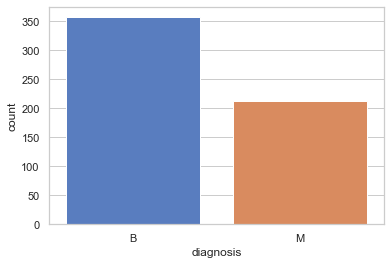

In [106]:
# Смотрим на распределение целевой переменной
barp = df.groupby("diagnosis").size().to_frame("count").reset_index()
sns.barplot(x="diagnosis", y="count", data=barp)
plt.show()

**Примечание**: колонка показывает диагноз тканей молочной железы, где M - злокачественный, B - доброкачественный. К сожалению (или набарот) выборка несбалансированная: "доброкачественный" класс преобладает. Нужно это учесть на этапе моделирования и выбора алгоритма. Тут есть статья о дизбалансе https://habr.com/ru/post/349078/


## Корреляционый анализ

In [119]:
# Находим пары признаков с коэффициентом корреляции больше 0.6
corr = df.corr()

CorField = []
for i in corr:
    for j in corr.index[corr[i] > 0.6]:
        if i != j and j not in CorField and i not in CorField:
            CorField.append(j)
            print("[{}] -> [{}]: {}".format(i, j, '%.4f' % corr[i][corr.index == j].values[0]))

[radius_mean] -> [perimeter_mean]: 0.9979
[radius_mean] -> [area_mean]: 0.9874
[radius_mean] -> [concavity_mean]: 0.6768
[radius_mean] -> [concave points_mean]: 0.8225
[radius_mean] -> [radius_se]: 0.6791
[radius_mean] -> [perimeter_se]: 0.6742
[radius_mean] -> [area_se]: 0.7359
[radius_mean] -> [radius_worst]: 0.9695
[radius_mean] -> [perimeter_worst]: 0.9651
[radius_mean] -> [area_worst]: 0.9411
[radius_mean] -> [concave points_worst]: 0.7442
[texture_mean] -> [texture_worst]: 0.9120
[smoothness_mean] -> [compactness_mean]: 0.6591
[smoothness_mean] -> [smoothness_worst]: 0.8053
[symmetry_mean] -> [symmetry_worst]: 0.6998
[fractal_dimension_mean] -> [fractal_dimension_se]: 0.6881
[fractal_dimension_mean] -> [fractal_dimension_worst]: 0.7673
[compactness_se] -> [concavity_se]: 0.8013
[compactness_se] -> [concave points_se]: 0.7441
[compactness_se] -> [compactness_worst]: 0.6788
[compactness_se] -> [concavity_worst]: 0.6391


**Примечание**: код выводит хорошо коррелирующие пары, в которых зависимость более 90%:
* [radius_mean] -> [perimeter_mean]
* [radius_mean] -> [area_mean]
* [radius_mean] -> [radius_worst]
* [radius_mean] -> [perimeter_worst]
* [radius_mean] -> [area_worst]

В таких случаях, лучше удалить одну из зависимых перемен для облегчения работы обучающего алгоритма. Я бы удалил все перечисленные атрибуты оставив только **[radius_mean]**

Еще раз смотрим на корреляцию перемен, только в графическом виде

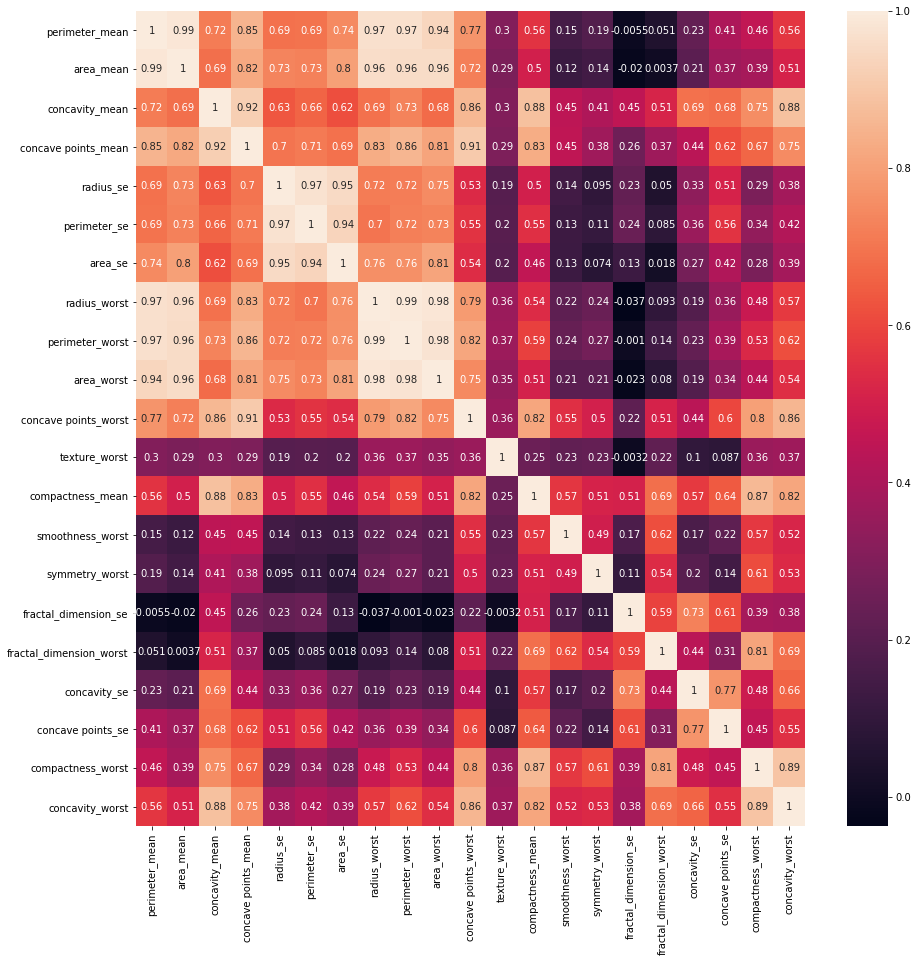

In [48]:
plt.figure(figsize=(15,15))
sns.heatmap(df[CorField].corr(), annot=True)

Еще другой 360 обзор "сильно коррелирующих" между собой перемен

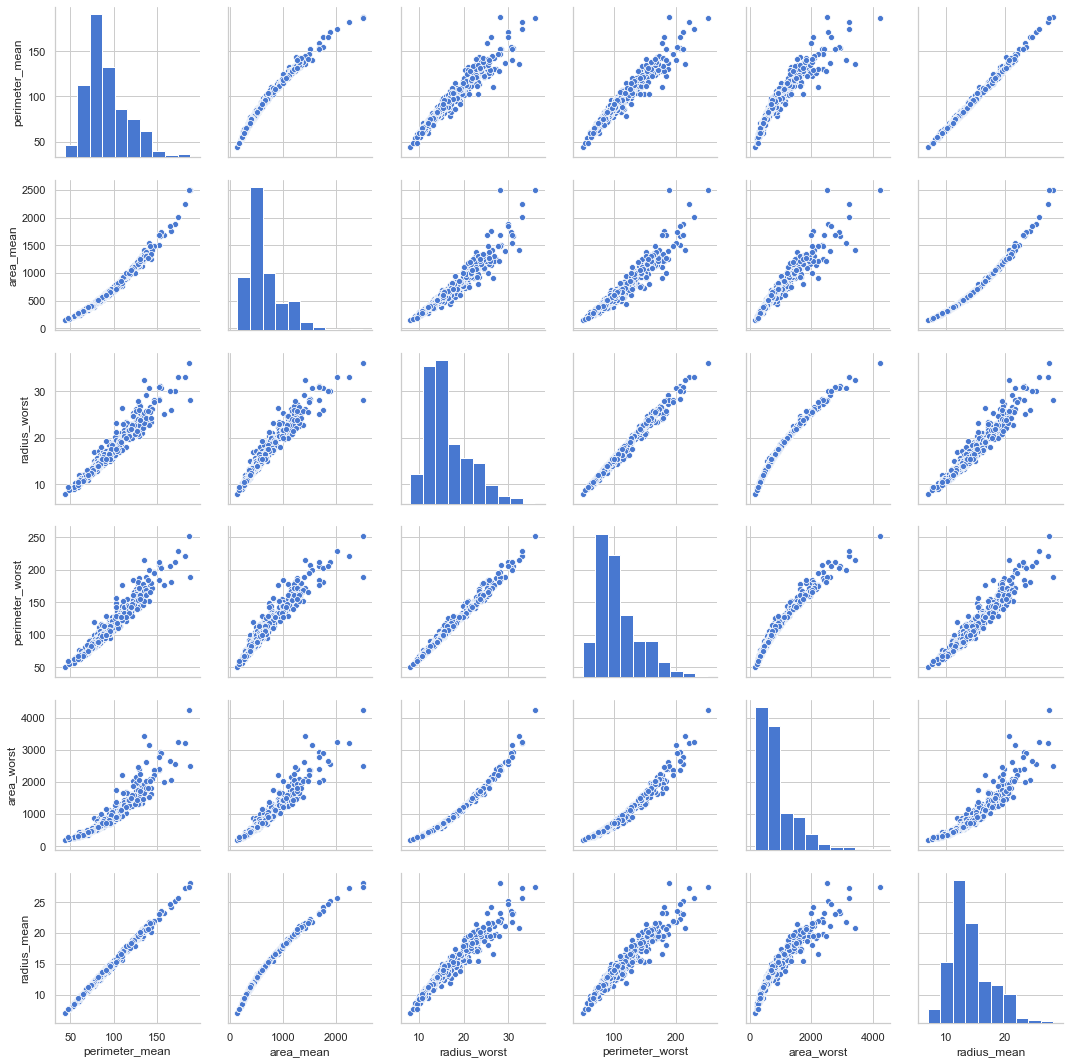

In [122]:
sns.pairplot(df[['perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst' ,'radius_mean']])
plt.show()

**Примечание**: вот так выглядит сильная корреляция, где-то очень, где-то нет. Например, на графике хорошо видна линейная зависимость между переменными radius_mean и perimetr_mean, где точки расположены по диагональной линий. А точки между переменными radius_mean и area_wort более рассеяны, что обозначает менее сильную корреляцию.

# 2. Выявление аномалий и анализ распределения классов

Ниже мы будем использовать **violin plot** полезен для анализа распределния классов. Переменных много, ширина экрана ограниченная, поэтому переменные разделены на две группы по 15 шт.

In [129]:
# Убираем целевую переменную в отдельный вектор. Просто, так удобно
y = df.diagnosis
x = df.drop("diagnosis", axis = 1)

data_dia = y
data = x

# стандартизация
data_n_2 = (data - data.mean()) / (data.std())

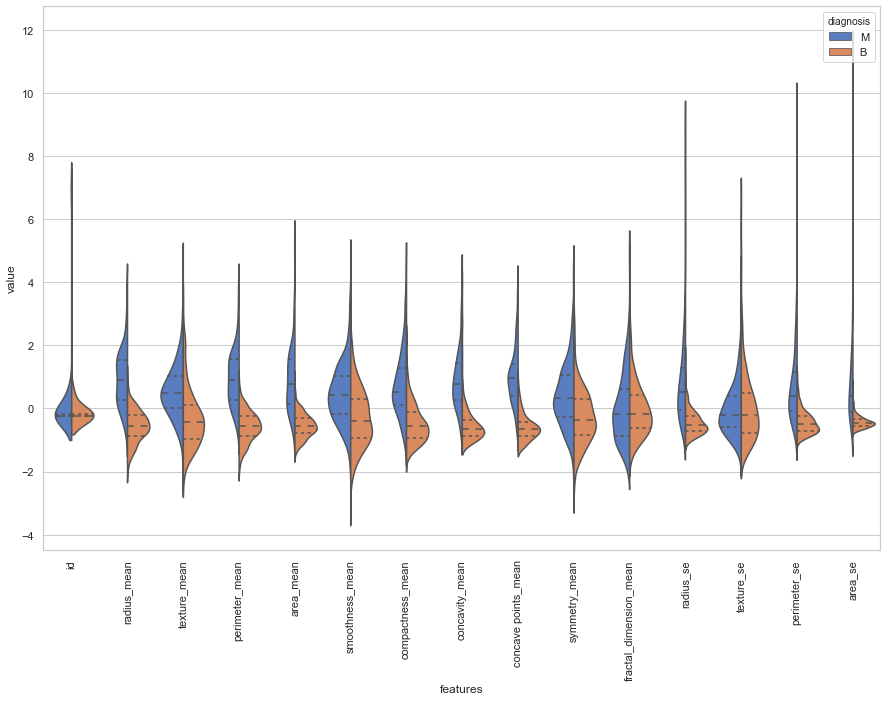

In [132]:
data = pd.concat([y,data_n_2.iloc[:,0:15]],axis=1)

data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

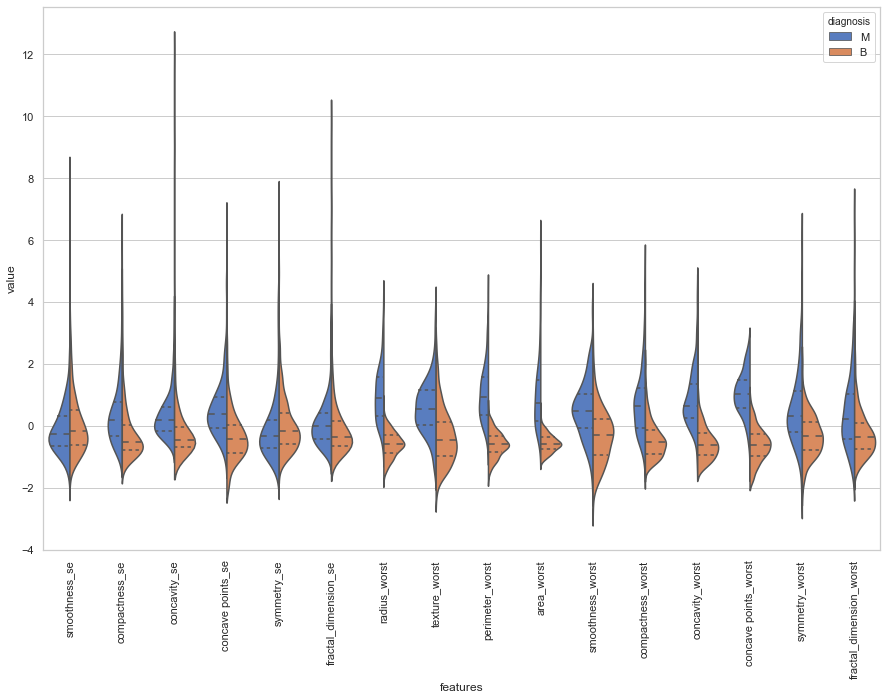

In [133]:
# вторая порция переменных
data = pd.concat([y,data_n_2.iloc[:,15:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

#### Примечание:
Как интерпретировать результат этого графика? 

Нужно смотреть на формы разноцветных фигур, расположенные по сторонам вертикальной оси. Если они симметричные то скорее всего атрибут плохо будет помогать в классификации. А если фигуры смещены, один вверх другой вниз, то атрибут является информативным для классификатора. 

На нашем примере, исходя из двух графиков я бы в датасете оставил следующие атрибуты:
* radius_mean
* perimeter_mean
* area_mean
* compactness_mean
* convactivity_mean
* concave points_mean
* radius_se

* radius_worst
* perimetr_worst
* area_worst
* concave points_worst
* concave_worst


По такому же принципу строим еще две группы графиков **swarm plot**.

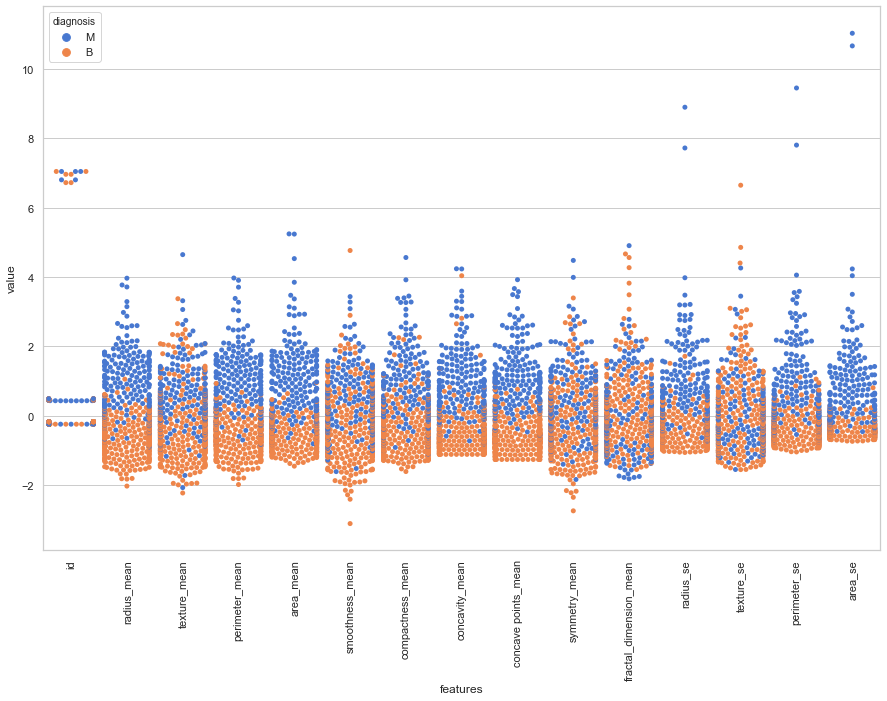

In [134]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization

data = pd.concat([y,data_n_2.iloc[:,0:15]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(15,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

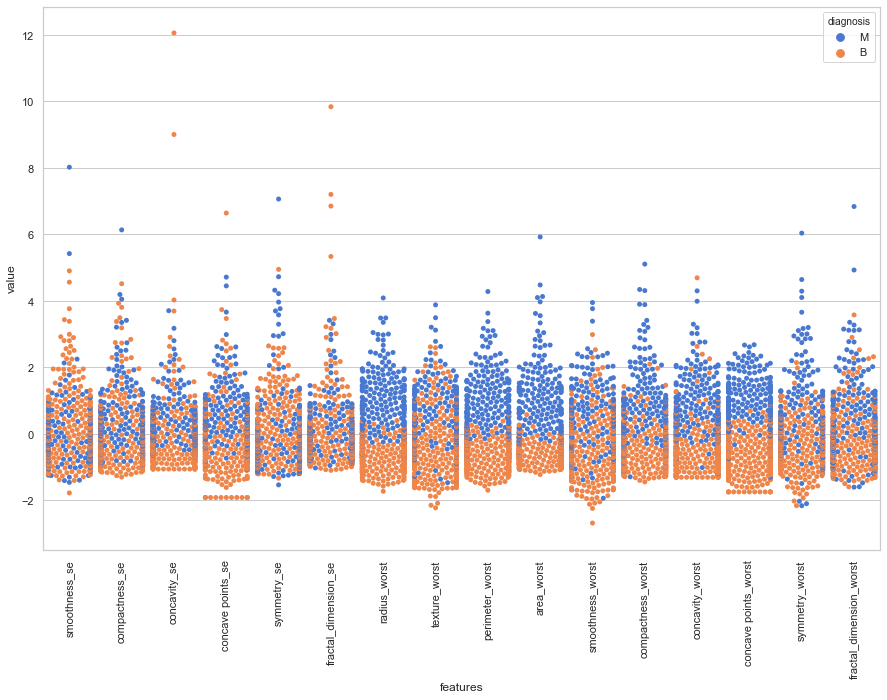

In [75]:
data = pd.concat([y,data_n_2.iloc[:,15:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
plt.show()

Мне такой вид визуализации нравится больше. Очень полезно для построения бинарного классификатора. Можно увидеть дисперсию более ясно.
По нему легче сказать, какие атрибут лучше не брать для дальнейшей классификации. По моим наблюденияем это:

* texture_mean
* smootheness_mean
* symmetry_mean
* compactness_mean
* fractal_dimension_mean
* texture_se

* smootheness_se
* compactness_se
* symmetry_se
* fractal_dimension_mean
* smootheness_worst
* symmetry_worst
* fractal_dimension_worst